# Pixels from Images

In [46]:
from PIL import Image
import numpy as np
import scipy.misc as smp

### OPENING IMAGE FROM A FILE

In [47]:
cupcakeImage = Image.open("Images/cupcake.jpeg")

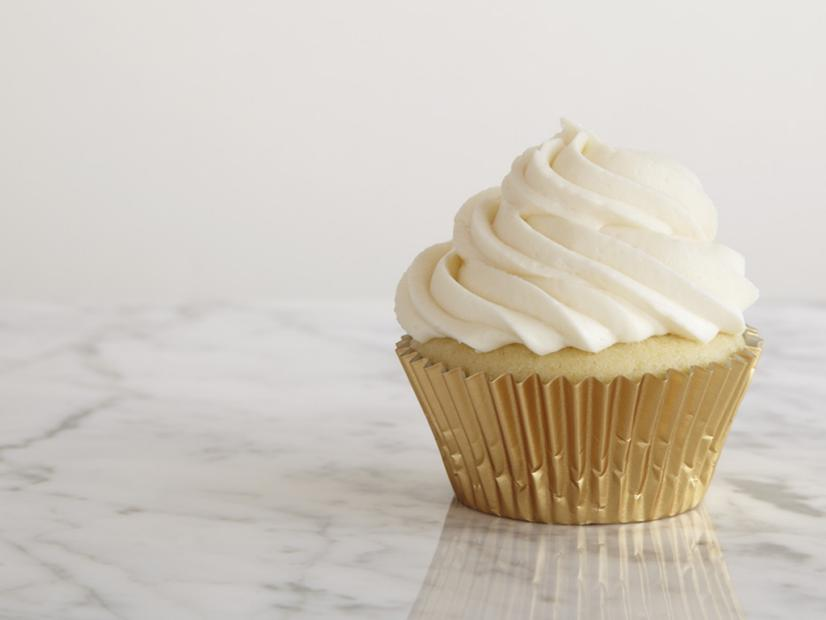

In [48]:
# now lets show the image
display(cupcakeImage)

### Getting pixel values from this file

In [49]:
#this converts the image data into a bitmap we can view and edit
bitmapOfCupcake = np.array(cupcakeImage)

### What is in this Bitmap? Let's find out.

In [50]:
#viewing the first pixel of the bitmap
print(bitmapOfCupcake[0][0])

[221 218 213]


### We've seen this before. Hmmm. Oh yeah! These are the rgb values for the file

In [51]:
#this is what the full image file looks like
print(bitmapOfCupcake)

[[[221 218 213]
  [221 218 213]
  [221 218 213]
  ...
  [232 231 227]
  [232 231 227]
  [232 231 227]]

 [[221 218 213]
  [221 218 213]
  [221 218 213]
  ...
  [232 231 227]
  [232 231 227]
  [232 231 227]]

 [[221 218 213]
  [221 218 213]
  [221 218 213]
  ...
  [232 231 227]
  [232 231 227]
  [232 231 227]]

 ...

 [[175 174 170]
  [175 174 170]
  [175 174 170]
  ...
  [204 203 201]
  [205 204 202]
  [205 204 202]]

 [[176 175 171]
  [176 175 171]
  [176 175 171]
  ...
  [204 203 201]
  [205 204 202]
  [205 204 202]]

 [[178 177 173]
  [178 177 173]
  [178 177 173]
  ...
  [205 204 202]
  [206 205 203]
  [206 205 203]]]


### -- Let's start changing some colors --

#### Basic structure to loop through an array

In [52]:
#for loop to go through every pixel in the array
for i in range(len(bitmapOfCupcake)):
    for j in range(len(bitmapOfCupcake[i])):
        pixel = bitmapOfCupcake[i][j]

### Shifting overall rgb values

#### We know that the rgb values go red green and blue.
#### Let's make that cupcake a nice juicy red.

In [53]:
### intialize a new bitmap
redFilterBitmap = np.array(cupcakeImage)

for i in range(len(redFilterBitmap)):
    for j in range(len(redFilterBitmap[i])):
        pixel = redFilterBitmap[i][j]
        
        #editing the red value of the pixel, first element because (r,g,b)
        pixel[0] = 255;

### Now let's convert the bitmap back to an image

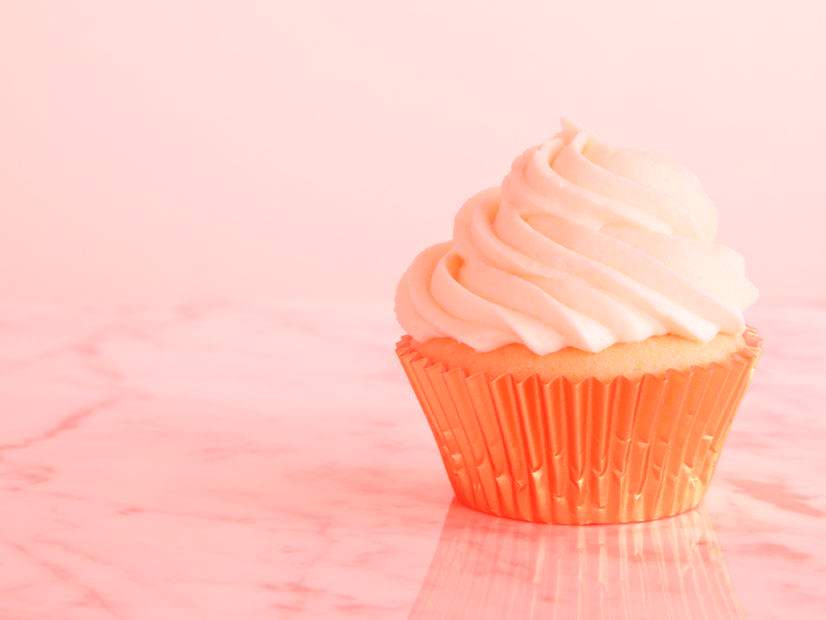

In [54]:
result = Image.fromarray(redFilterBitmap)
display(result)

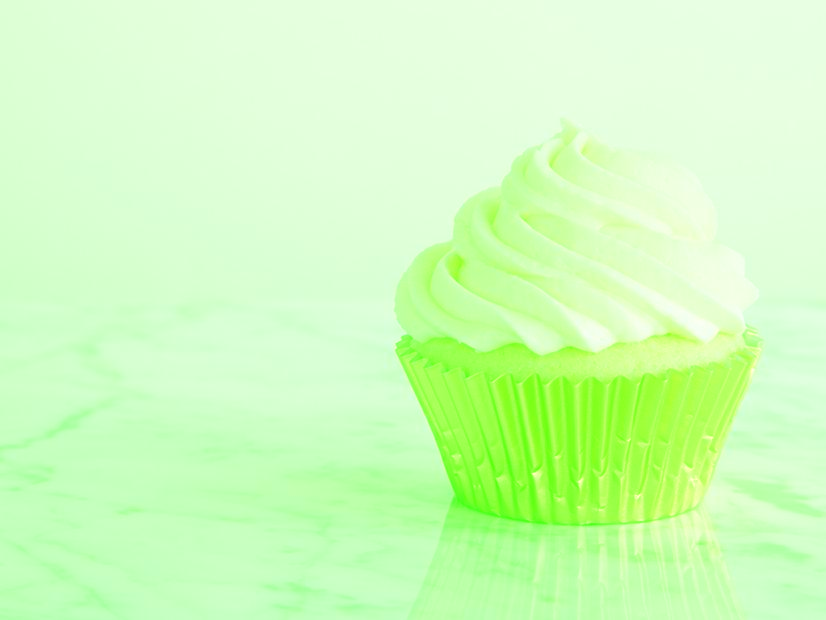

In [55]:
### intialize a new bitmap
greenFilterBitmap = np.array(cupcakeImage)

for i in range(len(greenFilterBitmap)):
    for j in range(len(greenFilterBitmap[i])):
        pixel = greenFilterBitmap[i][j]
        
        #editing the green value of the pixel, first element because (r,g,b)
        pixel[1] = 255;
        
result = Image.fromarray(greenFilterBitmap)
display(result)

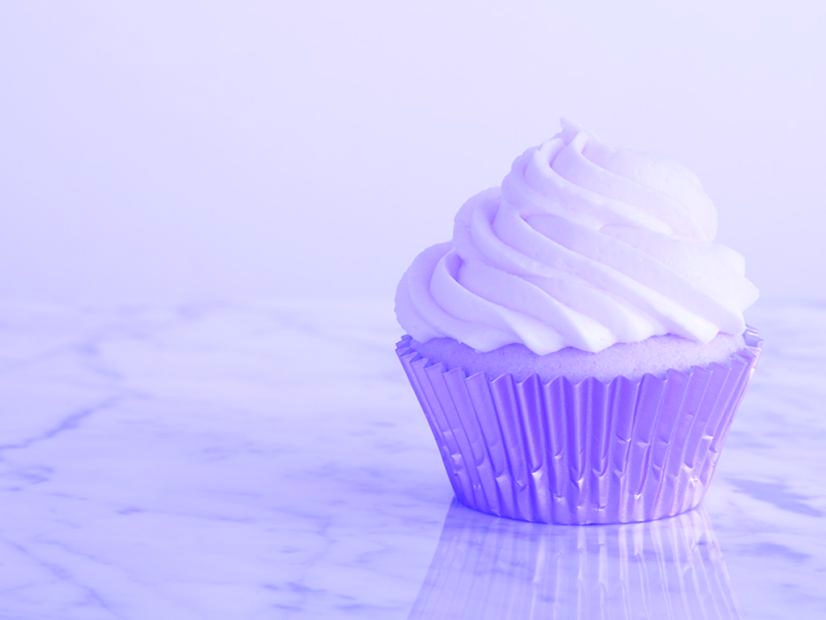

In [56]:
### intialize a new bitmap
blueFilterBitmap = np.array(cupcakeImage)

for i in range(len(blueFilterBitmap)):
    for j in range(len(blueFilterBitmap[i])):
        pixel = blueFilterBitmap[i][j]
        
        #editing the blue value of the pixel, first element because (r,g,b)
        pixel[2] = 255;
        
result = Image.fromarray(blueFilterBitmap)
display(result)

### Now let's try editing specific values of the image

In [57]:
phoneBoothImage = Image.open("Images/phoneBooth.png")

#### ORIGINAL

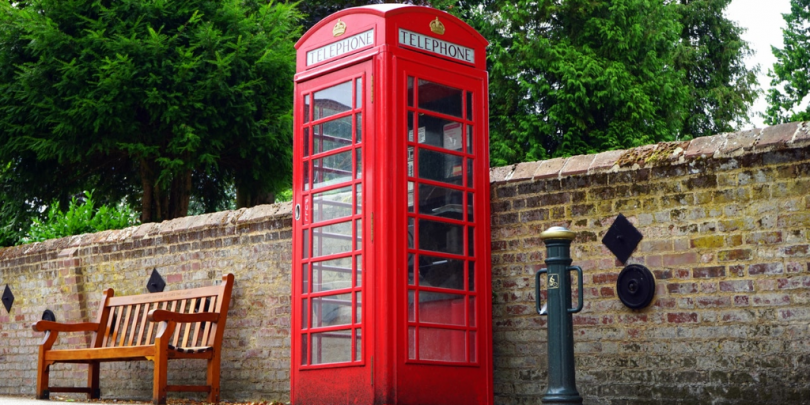

In [58]:
display(phoneBoothImage)

### Now let's make the phone booth stand out!
#### How do we do that?
* First We Need To find all pixels that are not red.
* Change only those pixels and make them gray scale.

#### Below we tried to find all pixel values that are not primarliy red.
#### We can see this clearly when we make the other pixels black

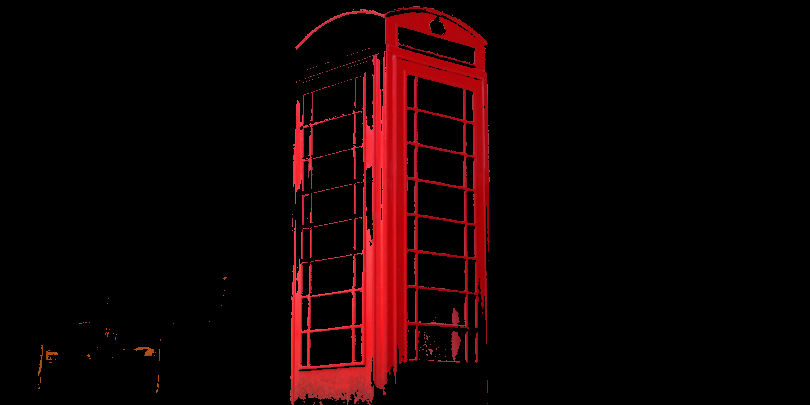

In [59]:
phoneBoothBitmap = np.array(phoneBoothImage)

for i in range(len(phoneBoothBitmap)):
    for j in range(len(phoneBoothBitmap[i])):
        pixel = phoneBoothBitmap[i][j]
        
        #red is anything where red > 150 ish and other
        # we need all values that are not high in red
        if not (pixel[0] > 150 and pixel[1] < 255/3 and pixel[2] < 255/3):
            pixel[0] = 0
            pixel[1] = 0
            pixel[2] = 0
        
result = Image.fromarray(phoneBoothBitmap)
display(result)

### Now to greyscale the rest

In [60]:
def greyScale(pixel):
    average = (int(pixel[0]) + int(pixel[1]) + int(pixel[2])) / 3
    pixel[0] = average
    pixel[1] = average
    pixel[2] = average

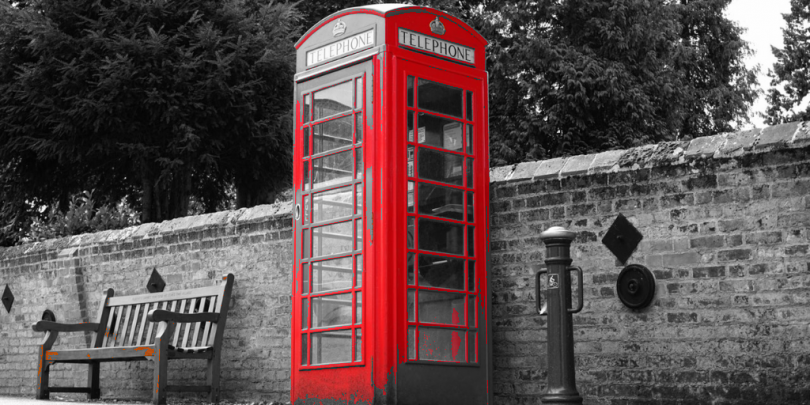

In [61]:
phoneBoothBitmap = np.array(phoneBoothImage)

for i in range(len(phoneBoothBitmap)):
    for j in range(len(phoneBoothBitmap[i])):
        pixel = phoneBoothBitmap[i][j]
        
        # red is anything where red > 150 ish and other
        # we need all values that are not high in red
        # we used 150 to get most of the pixels that are red
        # we used 255/3 because these also contain less than a third of the other color types
        if not (pixel[0] > 150 and pixel[1] < 255/3 and pixel[2] < 255/3):
            greyScale(pixel)
        
result = Image.fromarray(phoneBoothBitmap)
display(result)

### Grey scaling eveyrthing but the trees

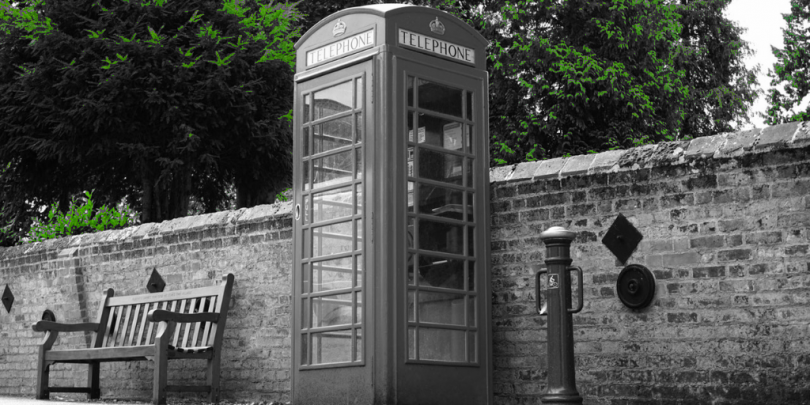

In [62]:
phoneBoothBitmap = np.array(phoneBoothImage)

for i in range(len(phoneBoothBitmap)):
    for j in range(len(phoneBoothBitmap[i])):
        pixel = phoneBoothBitmap[i][j]
        
        # we used 100 to get most of the pixels that are green
        # we change the pixel values of everything not green
        # we used 255/3 because these also contain less than a third of the other color types
        if not (pixel[0] < 255/3 and pixel[1] > 100 and pixel[2] < 255/3):
            greyScale(pixel)
        
result = Image.fromarray(phoneBoothBitmap)
display(result)

### Now its your turn!

### Try to change values from the google logo to different colors

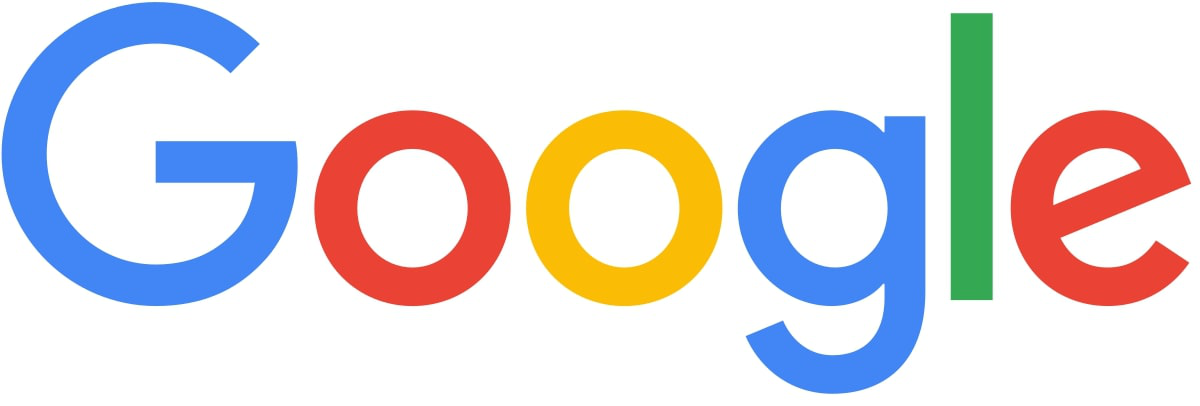

In [63]:
### Original
googleImage = Image.open("Images/googleLogo.png")
display(googleImage)

### Try to make the Blue Gs to Some other color!
#### Hint: A blue rgb value is probabaly something with a majority blue and a minotiry of the other pixels. For something like a google logo, you probably only need to consider the blue values of the pixel.

#### Here's a link to some RGB color values: https://www.color-hex.com/color-palettes/

In [64]:
# Write Code below

### Now try to make the background some color. Maybe alternate colors?
#### Hint: what color do you think the background is. now how is that color made up with rgb values.

In [65]:
# Write Code below

### Let's get into some steganography¶

#### Try to decode this image

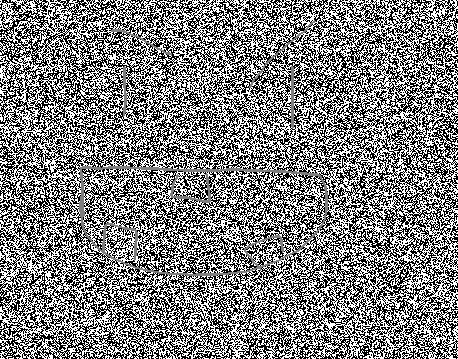

In [66]:
secretImage = Image.open("Images/EncodedSecret.png")
display(secretImage)